## Loading basic Python and R imports

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Answer the questions below. Explain your reasoning. 

In [5]:
%%R 

# z-score = (x-μ)/σ

# mean_mpg <- mean(mtcars$mpg)
# z_scores_mpg <- round((mtcars$mpg - mean_mpg) / sd(mtcars$mpg), 2 )
# mtcars %>% select(mpg) %>% mutate(z_scores_mpg, mean_mpg = round(mean(mpg),1))

NULL


In [6]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
%%R

my_theme <- theme_minimal() + 
    theme(plot.title = element_text(size=25),
          legend.position='bottom',
          legend.title=element_blank())


## Part 1 | mtcars

### 👉 Question 1: 
### Are automatic cars more fuel efficent than manual cars?

## $H_{0}$ = Null Hypothesis: 

- Automatic cars and manual cars are, on average, equally fuel efficient

in other words

- Automatic cars and manual cars come from **the same** distribution.

in other words

- One mean will do a better job of describing these two subsets of data than two means

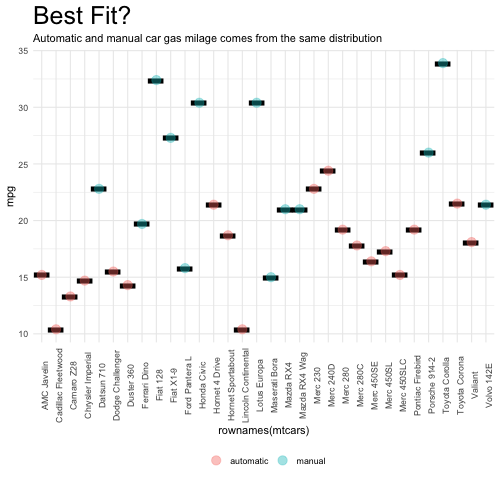

In [8]:
%%R -o mtcars -w 500

mtcars$am <- factor(mtcars$am, labels=c("automatic", "manual"))

ggplot(mtcars) +
    aes(x=rownames(mtcars), y=mpg, color=factor(am)) +
    geom_point(size=20, alpha=1, shape='-', color='black') +
    geom_point(size=4, alpha=.4) +
    labs(title="Best Fit?",
        subtitle="Automatic and manual car gas milage comes from the same distribution") +
    my_theme +
    theme(axis.text.x=element_text(angle=90))

In [9]:
mtcars = mtcars.assign(mpg_null=lambda df:df.mpg.mean().round(1))
mtcars.sample(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_null
Camaro Z28,13.3,8.0,350.0,245.0,3.73,3.840,15.41,0.0,automatic,3.0,4.0,20.1
Lincoln Continental,10.4,8.0,460.0,215.0,3.00,5.424,17.82,0.0,automatic,3.0,4.0,20.1
Pontiac Firebird,19.2,8.0,400.0,175.0,3.08,3.845,17.05,0.0,automatic,3.0,2.0,20.1
Merc 280C,17.8,6.0,167.6,123.0,3.92,3.440,18.90,1.0,automatic,4.0,4.0,20.1
Lotus Europa,30.4,4.0,95.1,113.0,3.77,1.513,16.90,1.0,manual,5.0,2.0,20.1
Porsche 914-2,26.0,4.0,120.3,91.0,4.43,2.140,16.70,0.0,manual,5.0,2.0,20.1
Merc 450SE,16.4,8.0,275.8,180.0,3.07,4.070,17.40,0.0,automatic,3.0,3.0,20.1
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,automatic,3.0,4.0,20.1
Chrysler Imperial,14.7,8.0,440.0,230.0,3.23,5.345,17.42,0.0,automatic,3.0,4.0,20.1
Fiat X1-9,27.3,4.0,79.0,66.0,4.08,1.935,18.90,1.0,manual,4.0,1.0,20.1


In [10]:
sum((mtcars.mpg - mtcars.mpg.mean())**2) / len(mtcars)

35.188974609374995

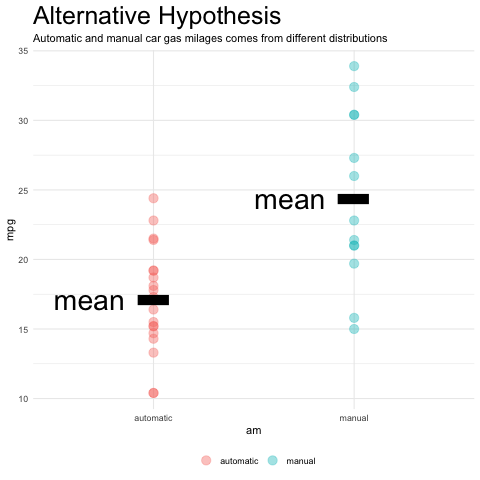

In [11]:
%%R 


ggplot(mtcars) +
    aes(x=am, y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Alternative Hypothesis",
        subtitle="Automatic and manual car gas milages comes from different distributions") +
    my_theme

In [12]:
mean_mpg_by_am = pd.DataFrame(
    mtcars.groupby('am').mpg.mean()
).reset_index().round(1)

mean_mpg_by_am

,am,mpg
0,automatic,17.1
1,manual,24.4


In [13]:
mtcars = mtcars.merge(mean_mpg_by_am, on='am', suffixes=('','_alt'))
mtcars.sample(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_null,mpg_alt
15,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,automatic,3.0,1.0,20.1,17.1
14,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,automatic,3.0,2.0,20.1,17.1
5,33.9,4.0,71.1,65.0,4.22,1.835,19.90,1.0,manual,4.0,1.0,20.1,24.4
22,17.3,8.0,275.8,180.0,3.07,3.730,17.60,0.0,automatic,3.0,3.0,20.1,17.1
16,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,automatic,3.0,4.0,20.1,17.1
21,16.4,8.0,275.8,180.0,3.07,4.070,17.40,0.0,automatic,3.0,3.0,20.1,17.1
3,32.4,4.0,78.7,66.0,4.08,2.200,19.47,1.0,manual,4.0,1.0,20.1,24.4
24,10.4,8.0,472.0,205.0,2.93,5.250,17.98,0.0,automatic,3.0,4.0,20.1,17.1
27,21.5,4.0,120.1,97.0,3.70,2.465,20.01,1.0,automatic,3.0,1.0,20.1,17.1
1,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,manual,4.0,4.0,20.1,24.4


So which is a better mean? mpg_null or mpg_alt?

In [159]:
# Let's calculate variance for the null hypothesis

diff = mtcars.mpg - mtcars.mpg_null
diff_sq = diff ** 2
sum_sq_diff = sum(diff_sq)
avg_sum_sq_diff = sum_sq_diff / len(mtcars)
avg_sum_sq_diff

35.18906249999999

In [138]:
# Another way
((mtcars.mpg - mtcars.mpg.mean())**2).sum() / len(mtcars)

35.188974609374995

Oh hey, that looks an awful lot like

Variance $(\sigma^2) = \frac{\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2} {N}$

In [139]:
# Another way, ignore the ddof variable for now
# https://numpy.org/doc/stable/reference/generated/numpy.var.html
mtcars.mpg.var(ddof=0)

35.188974609374995

In [136]:
# now let's do the same for the alternative hypothesis

diff = mtcars.mpg - mtcars.mpg_alt
diff_sq = diff ** 2
sum_sq_diff = sum(diff_sq)
avg_sum_sq_diff = sum_sq_diff / len(mtcars)
avg_sum_sq_diff

22.529374999999995

In [145]:
var_null = sum((mtcars['mpg'] - mtcars['mpg_null'])**2) / len(mtcars)
var_alt = sum((mtcars['mpg'] - mtcars['mpg_alt'])**2) / len(mtcars)
print("Variance Around 1 mean", var_null)
print("Variance Around 2 means", var_alt)

Variance Around 1 mean 35.18906249999999
Variance Around 2 means 22.529374999999995


In [157]:
%%R 

mtcars_a = mtcars %>% filter(am=='automatic')
mtcars_m = mtcars %>% filter(am=='manual')

t.test(mtcars_a$mpg, mtcars_m$mpg)


	Welch Two Sample t-test

data:  mtcars_a$mpg and mtcars_m$mpg
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean of x mean of y 
 17.14737  24.39231 



In [149]:
(var_null - var_alt)/var_alt

0.5619191610952368

In [147]:
import math
var_null = sum((mtcars['mpg'] - mtcars['mpg_null'])**2) / len(mtcars)
var_alt = sum((mtcars['mpg'] - mtcars['mpg_alt'])**2) / len(mtcars)
print("STD 1 mean", math.sqrt(var_null))
print("STD 2 means", math.sqrt(var_alt))

STD 1 mean 5.932036960437788
STD 2 means 4.7465118771577925


In [315]:
for x in range(100):
    x = [np.random.normal(0,1) for x in range(100)]
    y = [np.random.normal(0,1) for x in range(100)]

    df = pd.DataFrame([x,y]).T
    df.columns = ['x','y']

    sse_x = sum((df.x - df.x.mean())**2)
    sse_y = sum((df.y - df.y.mean())**2)
#     print(round(sse_x,1), 
#           round(sse_y, 1))

    all_values = pd.concat([df.x, df.y])
    sse_x_null = sum((df.x - all_values.mean())**2)
    sse_y_null = sum((df.y - all_values.mean())**2)
#     print(round(sse_x_null,1), 
#           round(sse_y_null, 1))


#     print(sse_x_null - sse_x)
#     print(sse_y_null - sse_y)
    
    if sse_x_null - sse_x < 0:
        break
        print("BREAK")

In [274]:
%%R

t.test(mtcars ~ group, data = genderweight)

R[write to console]: Error in eval(m$data, parent.frame()) : object 'genderweight' not found




Error in eval(m$data, parent.frame()) : object 'genderweight' not found


RInterpreterError: Failed to parse and evaluate line '\nt.test(mtcars ~ group, data = genderweight)\n'.
R error message: "Error in eval(m$data, parent.frame()) : object 'genderweight' not found"

## Part 2 | Last Year's Polly (Anonymized)


### 👉 Question 2: Are Dhrumil's students more stressed than Irena's?

In [191]:
%%R

# read some functions from the functions.R file
source('functions.R')

In [192]:
%%R -o q_emotions

q_emotions <- read_csv('emotion.csv', show_col_types = FALSE) %>% 
        mutate(date=as.Date(date), 
        emoji = factor(emoji, levels=c('😍', '🙂', '😐', '🙁', '😢'))) 

q_emotions


# A tibble: 585 × 6
   date       user_id                          choice_id emoji question editor 
   <date>     <chr>                                <dbl> <fct> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 😍    emotion  Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         1 🙂    emotion  Dhrumil
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         2 😍    emotion  Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         1 🙂    emotion  Irena  
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         1 🙂    emotion  Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 😍    emotion  Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         2 😍    emotion  Dhrumil
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         0 😐    emotion  Dhrumil
 9 2022-05-13 89135d5c75496c9d94251f30c748b9b8        -2 😢    emotion  Irena  
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         2 😍    emotion  Dhrumil
# … with 575 more rows
# ℹ Use

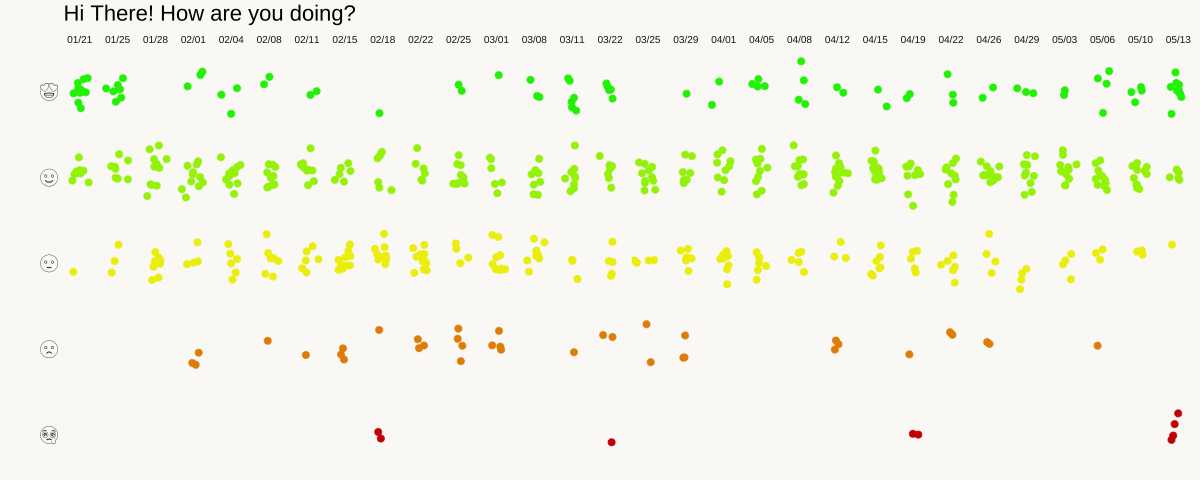

In [193]:
%%R -w 1200

plot_type_1(q_emotions)

In [194]:
q_emotions = pd.read_csv('emotion.csv', parse_dates=['date'])
q_emotions.emoji.unique()

array(['😍', '🙂', '😐', '😢', '🙁'], dtype=object)

In [195]:
# hint: try a pivot table (or a group by)

In [196]:
q_emotions.mean()

choice_id    0.697436
dtype: float64

In [197]:
q_emotions.groupby('editor').mean()

,choice_id
editor,
Dhrumil,0.756667
Irena,0.635088


In [202]:
%%R

d <- q_emotions %>% filter(editor=='Dhrumil')
i <- q_emotions %>% filter(editor=='Irena')

t.test(d$choice_id, i$choice_id)


	Welch Two Sample t-test

data:  d$choice_id and i$choice_id
t = 1.7076, df = 582.95, p-value = 0.08825
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01825952  0.26141742
sample estimates:
mean of x mean of y 
0.7566667 0.6350877 



### 👉 Question 3: Do Dhrumil's students have a heavier workload than Irena's?

In [204]:
%%R 

q_workload <- read_csv('workload.csv', show_col_types = FALSE)
q_workload

# A tibble: 543 × 5
   date       user_id                          choice_id question editor 
   <date>     <chr>                                <dbl> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 workload Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         4 workload Irena  
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         6 workload Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         3 workload Dhrumil
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         4 workload Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 workload Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         5 workload Irena  
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         4 workload Irena  
 9 2022-05-13 a9864a7d130ce52cf17579545fc96643         5 workload Dhrumil
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         1 workload Dhrumil
# … with 533 more rows
# ℹ Use `print(n = ...)` to see more rows


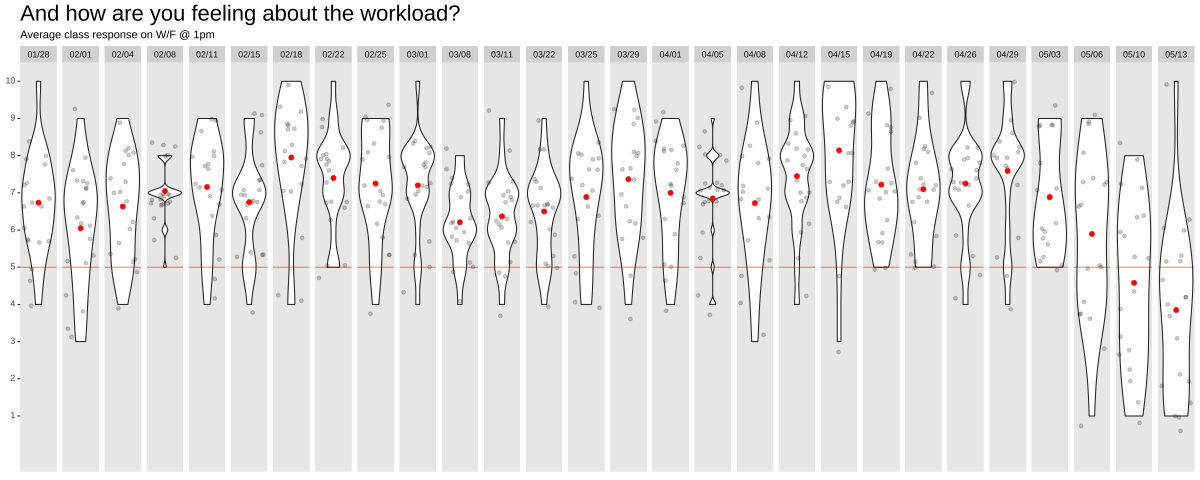

In [205]:
%%R -w 1200

# Data at a glance
plot_type_2(q_workload)

In [206]:
q_workload = pd.read_csv('workload.csv', parse_dates=['date'])
q_workload

,date,user_id,choice_id,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,workload,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,4,workload,Irena
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,6,workload,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,3,workload,Dhrumil
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,4,workload,Dhrumil
...,...,...,...,...,...
538,2022-01-28,5119dd707d353a28b41fa1adcdda76be,6,workload,Dhrumil
539,2022-01-28,b049b7eae43713e6aca6320c57b3bb88,8,workload,Irena
540,2022-01-28,5a7ac9a0ee30d1e7bedafd9046162fc7,6,workload,Irena
541,2022-01-28,2ab5e1542adfb5cbd739a0e443d7408b,5,workload,Irena


In [207]:
# hint: try a pivot table (or a group by)

In [209]:
%%R

d <- q_workload %>% filter(editor=='Dhrumil')
i <- q_workload %>% filter(editor=='Irena')

t.test(d$choice_id, i$choice_id)


	Welch Two Sample t-test

data:  d$choice_id and i$choice_id
t = -1.4969, df = 498.05, p-value = 0.1351
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.52867962  0.07145615
sample estimates:
mean of x mean of y 
 6.658120  6.886731 



# Pollster Ratings

### 👉 Question 4: Are Gubernatorial Polls More Accurate Than Senate Polls?

In [213]:
%%R

s_g_polls <- read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv', show_col_types = FALSE) %>% 
    filter(type_detail %in% c('Gov-G', 'Sen-G')) %>%
    filter(location != 'US')
    
s_g_polls


# A tibble: 4,014 × 33
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G   Sen-G   Garin-…     113
 6   26255     31495    1741  1998 1998… OH      Sen-G   Sen-G   Univer…     346
 7   54202     87738    1435  1998 1998… AZ      Gov-G   Gov-G   Behavi…      27
 8   54291     87827    1443  1998 1998… IL      Gov-G   Gov-G   WCIA-TV     373
 9   54273     87809    1444  1998 1998… IA      Gov-G   Gov-G   Drake …     329
10   54346     87882    1451  1998 1998… NE      Gov-G   Gov-G   Mason-…     197
# … w

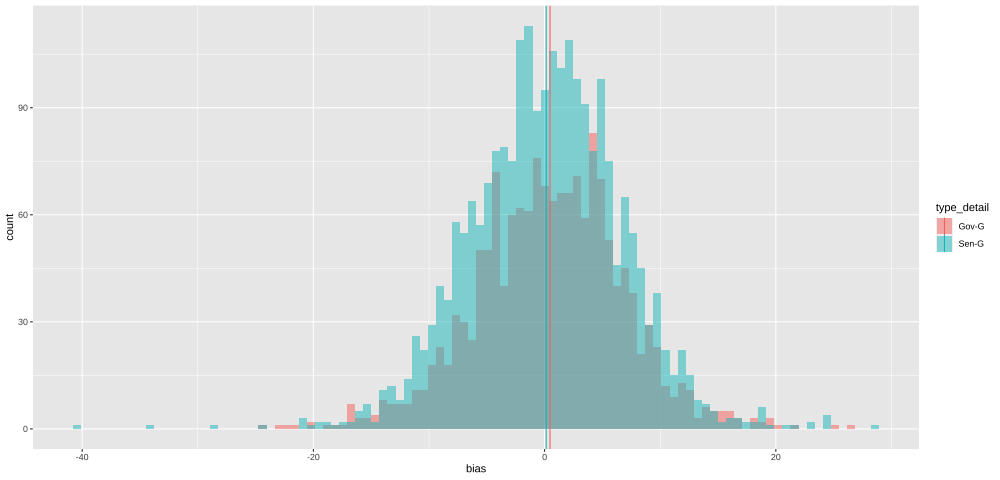

In [214]:
%%R -w 1000

mean_bias <- s_g_polls %>% 
filter(!is.na(bias)) %>%
    group_by(type_detail) %>% 
    summarise(bias=mean(bias))

ggplot(s_g_polls) +
    aes(x=bias, fill=type_detail) +
    geom_histogram(alpha=.5, bins=100, position='identity') +
    geom_vline(data=mean_bias, aes(xintercept=bias, color=type_detail))

In [215]:
s_g_polls = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv') \
    .query("type_detail.isin(['Gov-G', 'Sen-G'])")\
    .query("location!='US'")           

s_g_polls

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,72624,136296,6280,2020,2020_Sen-G_MI,MI,Sen-G,Sen-G,Research Co.,449,...,15.0,11/3/2020,49.90,48.22,1.69,13.31,13.31,1.0,8.305356,NaN
10726,72625,136297,6281,2020,2020_Sen-G_MN,MN,Sen-G,Sen-G,Research Co.,449,...,11.0,11/3/2020,48.74,43.50,5.24,5.76,5.76,1.0,1.249939,NaN
10727,72626,136298,6287,2020,2020_Sen-G_NJ,NJ,Sen-G,Sen-G,Research Co.,449,...,23.0,11/3/2020,57.23,40.92,16.31,6.69,6.69,1.0,0.357477,NaN
10728,72864,140394,6292,2020,2020_Sen-G_SC,SC,Sen-G,Sen-G,Optimus,245,...,-9.8,11/3/2020,44.17,54.44,-10.27,0.47,0.47,1.0,-6.938997,NaN


In [216]:
s_g_polls.bias.mean()

0.2702512820512822

In [231]:
%%R

s <- s_g_polls %>% filter(type_detail=="Sen-G")
g <- s_g_polls %>% filter(type_detail=="Gov-G")

t.test(s$bias, g$bias)


	Welch Two Sample t-test

data:  s$bias and g$bias
t = -1.5609, df = 3408.6, p-value = 0.1186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.74691303  0.08478878
sample estimates:
mean of x mean of y 
0.1366380 0.4677001 

